In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


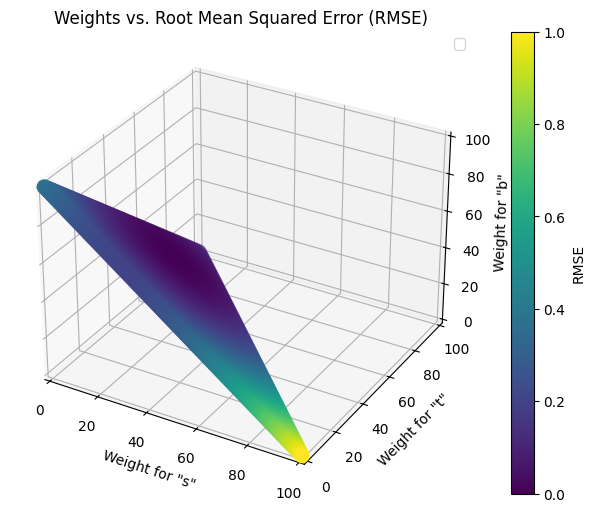

Best Combination (w1(side), w2(top), w3(bottom)): (15, 56, 29)
Corresponding Root Mean Squared Error (RMSE): 20.935224460985356


In [2]:
# Read the datasets
predicted_volume_data = pd.read_csv('../Data/avg_svm_predictions_views_with_true_volume.csv')
true_volume_data = pd.read_csv('../Data/true_volume.csv')

# Generate valid combinations of weights
valid_combinations = []
for x in range(101):
    for y in range(101):
        z = 100 - x - y
        if z >= 0 and x + y + z == 100:
            valid_combinations.append((x, y, z))

# Initialize lists to store RMSE and MSE for each combination
rmse_values = []
mse_values = []

# Calculate RMSE and MSE for each combination
for combination in valid_combinations:
    w1, w2, w3 = combination
    predicted_volume = (w1 * predicted_volume_data['s'] + w2 * predicted_volume_data['t'] + w3 * predicted_volume_data['b']) / 100
    mse = ((predicted_volume - true_volume_data['Volume']) ** 2).mean()
    rmse = np.sqrt(mse)
    mse_values.append(mse)
    rmse_values.append(rmse)

# Find the combination with the lowest RMSE
best_combination_idx = np.argmin(rmse_values)
best_combination = valid_combinations[best_combination_idx]
best_predicted_volume = (best_combination[0] * predicted_volume_data['s'] + best_combination[1] * predicted_volume_data['t'] + best_combination[2] * predicted_volume_data['b']) / 100
best_rmse = rmse_values[best_combination_idx]

# Plot weights against RMSE
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot all combinations as scatter plot
ax.scatter([comb[0] for comb in valid_combinations], 
           [comb[1] for comb in valid_combinations], 
           [comb[2] for comb in valid_combinations], 
           c=rmse_values, cmap='viridis', marker='o', s=100)

# Add color bar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.set_label('RMSE')

# Add labels and title
ax.set_xlabel('Weight for "s"')
ax.set_ylabel('Weight for "t"')
ax.set_zlabel('Weight for "b"')
ax.set_title('Weights vs. Root Mean Squared Error (RMSE)')
ax.legend()

# Set plot limits
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_zlim([0, 100])

plt.show()

# Print the best combination and its RMSE
print("Best Combination (w1(side), w2(top), w3(bottom)):", best_combination)
print("Corresponding Root Mean Squared Error (RMSE):", best_rmse)


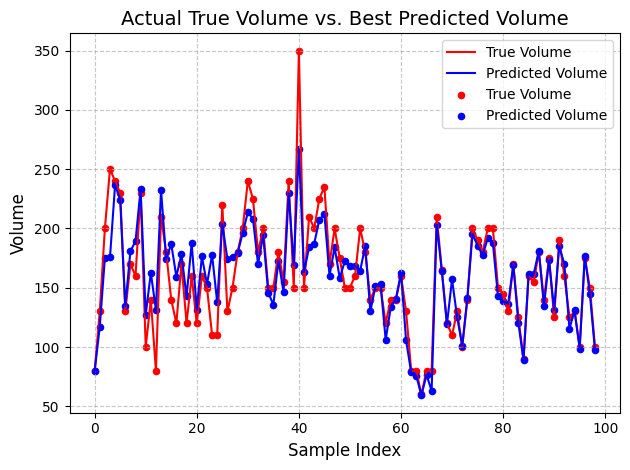

In [3]:
# Plot actual true volume
plt.plot(true_volume_data['Volume'], color='red', label='True Volume')

# Plot best predicted volume
plt.plot(best_predicted_volume, color='blue', label='Predicted Volume')

# Plot individual volume points
plt.scatter(true_volume_data.index, true_volume_data['Volume'], color='red', label='True Volume', s=20)
plt.scatter(true_volume_data.index, best_predicted_volume, color='blue', label='Predicted Volume', s=20)

# Set labels and title
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Actual True Volume vs. Best Predicted Volume', fontsize=14)

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()